In [364]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

data = pd.read_csv('hw2/hmelq.csv')
data.dropna(inplace = True)
df=data.copy() 
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


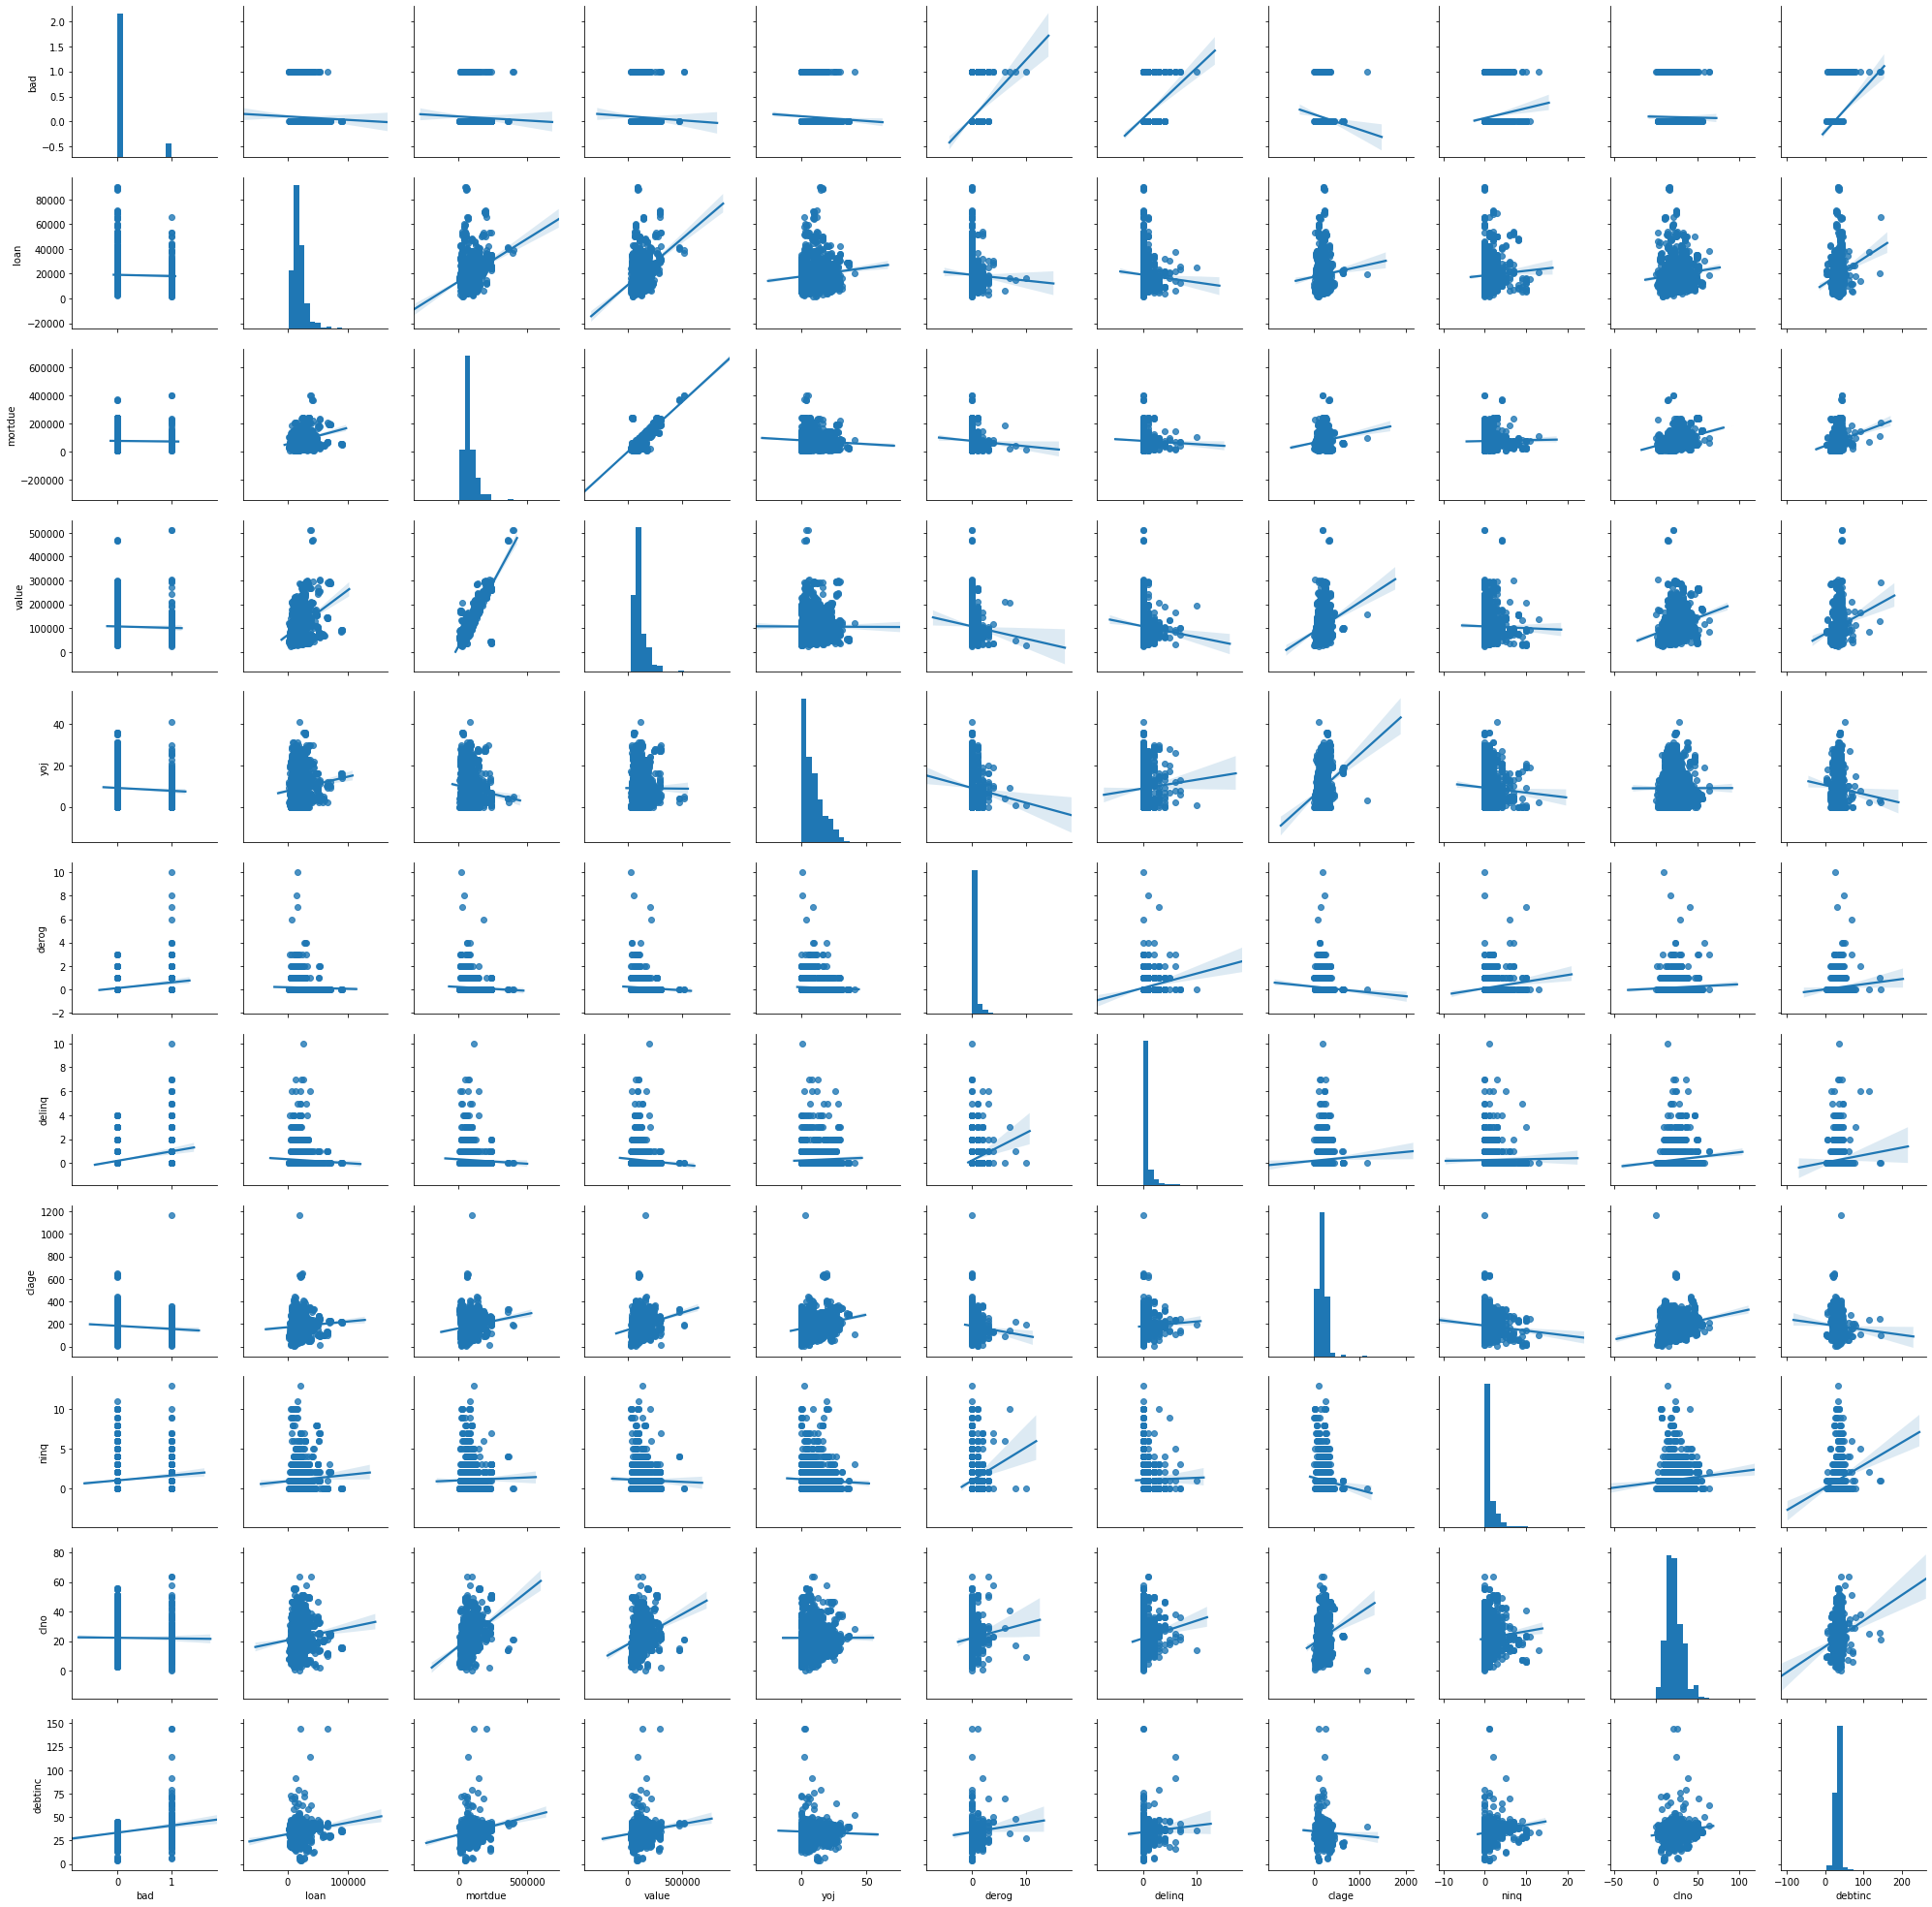

In [288]:
sns.pairplot(df, kind = "reg")

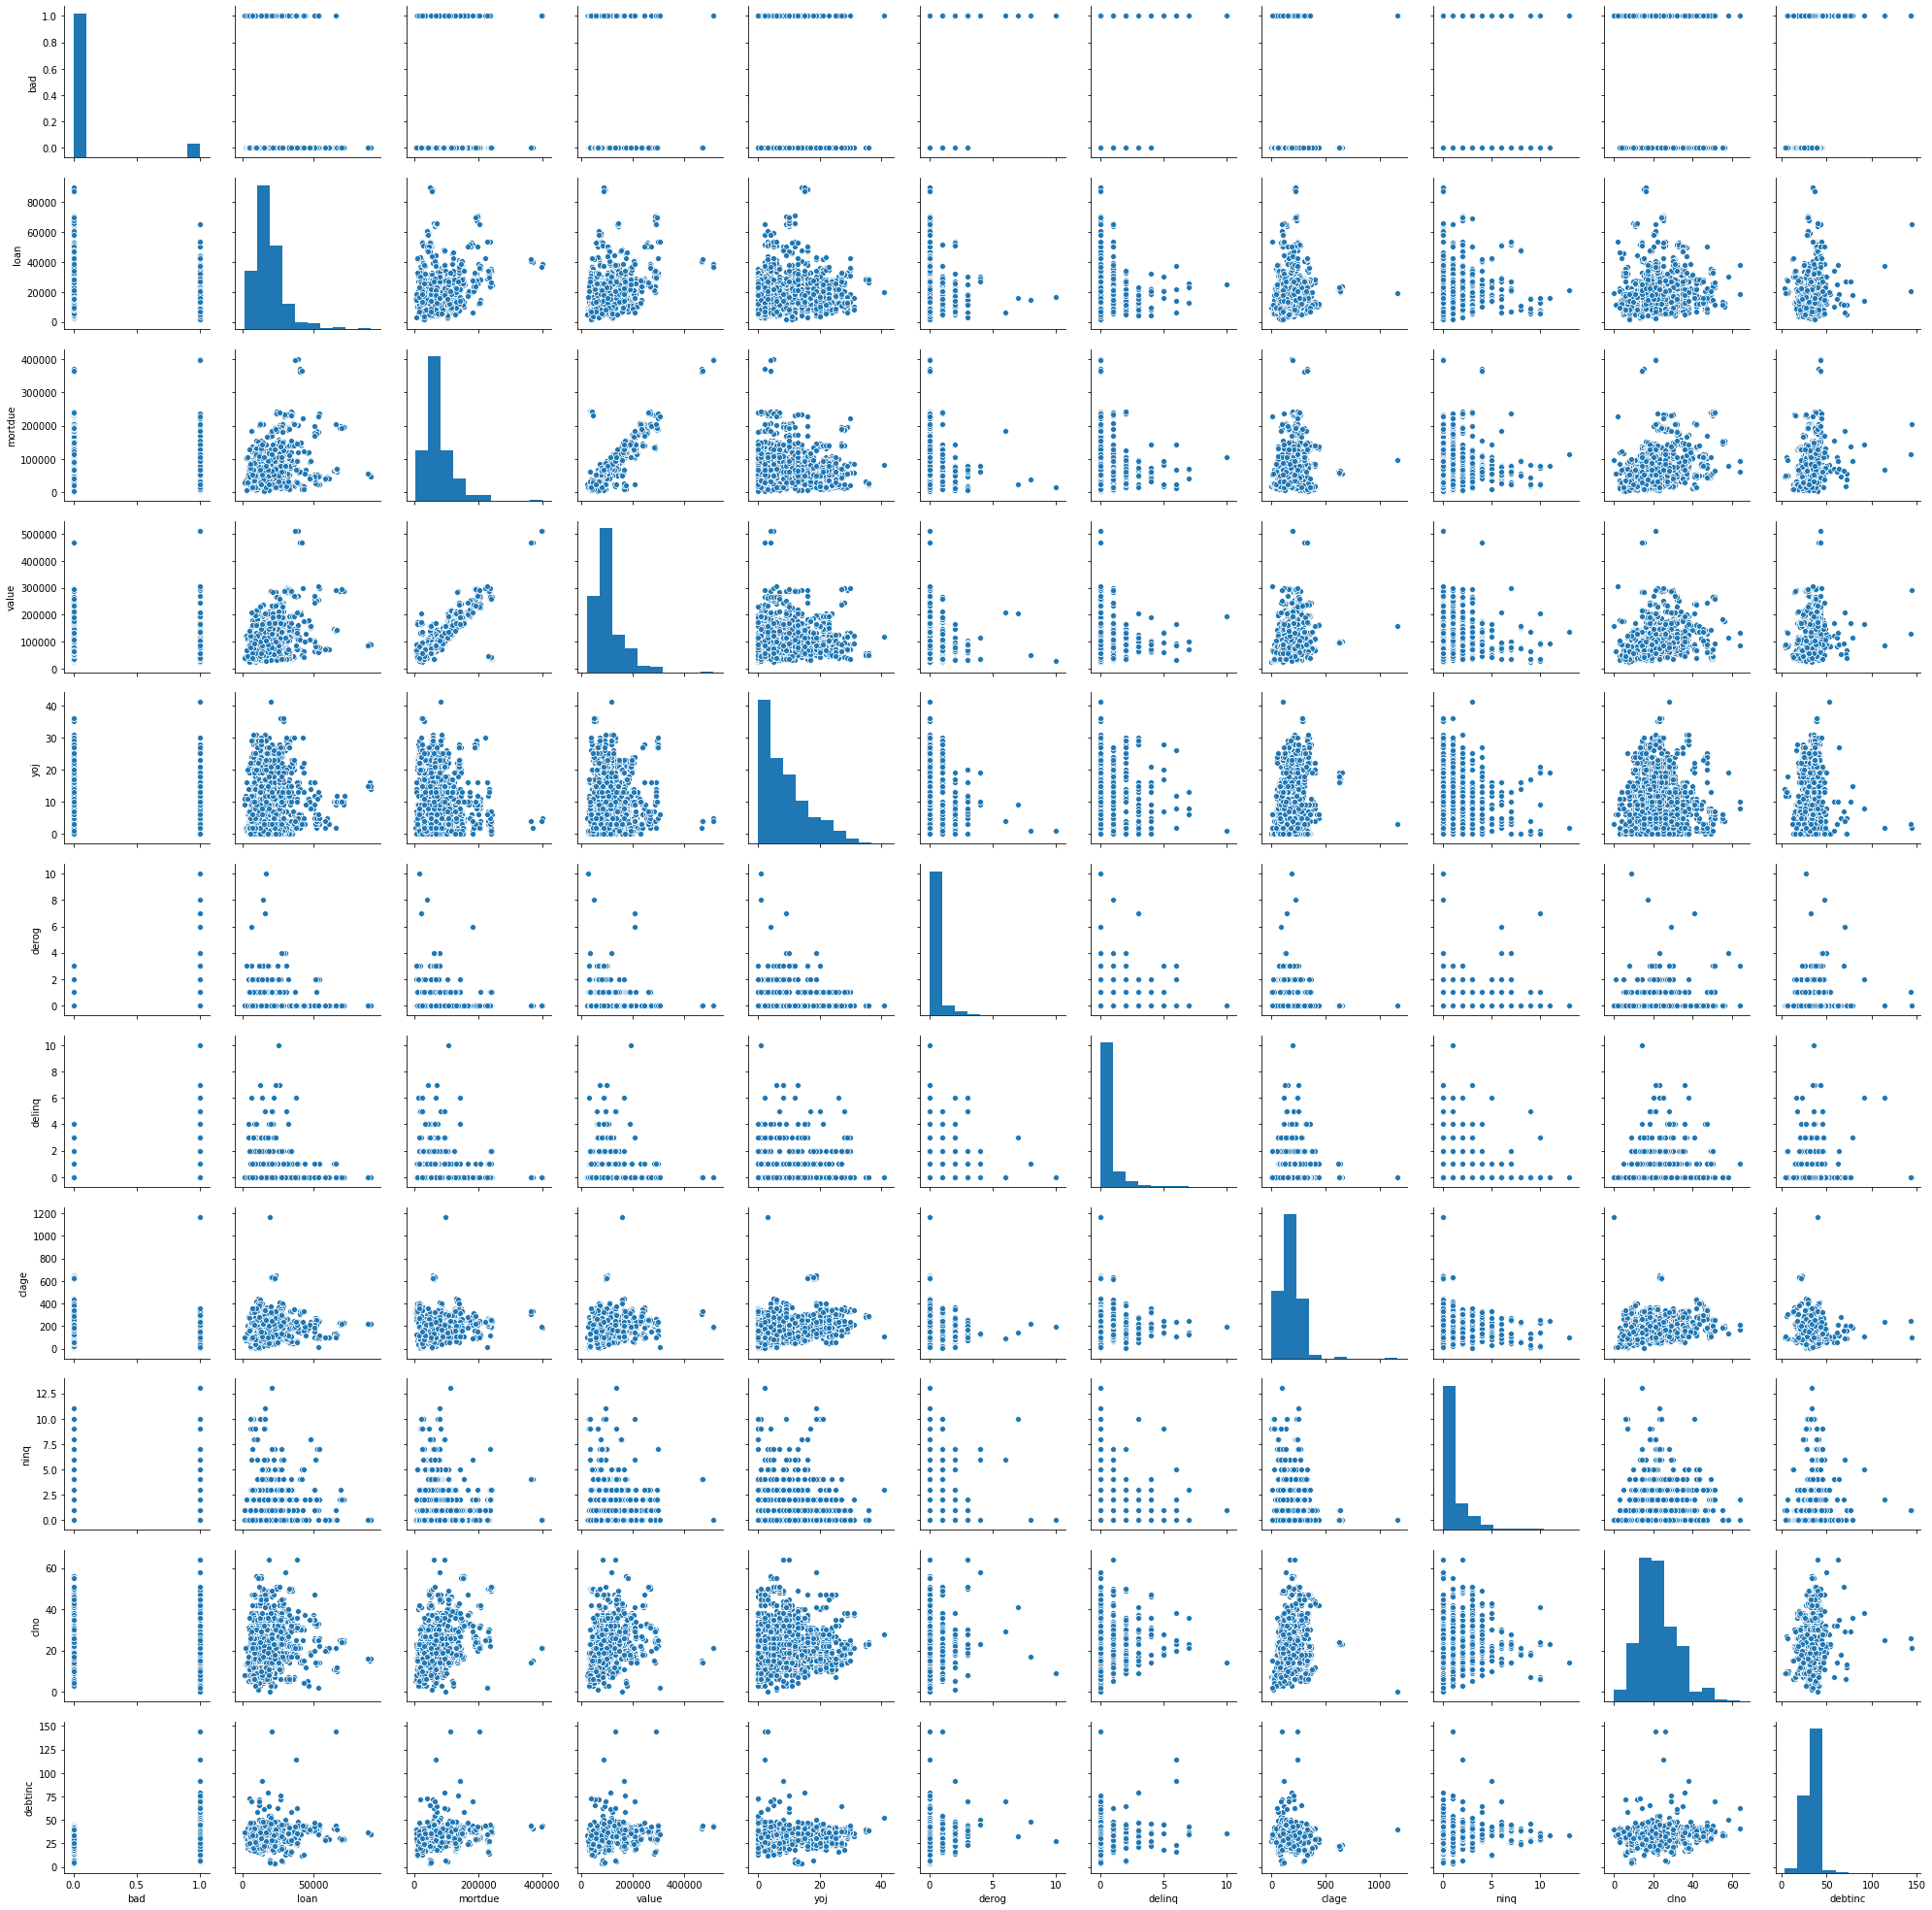

In [289]:
sns.pairplot(df, kind = "scatter")

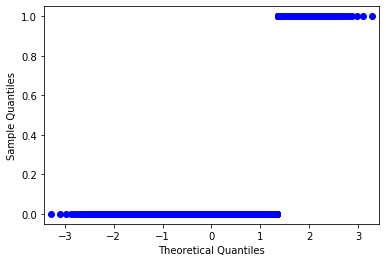

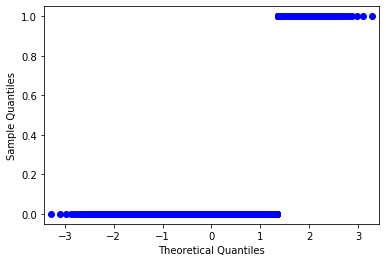

In [290]:
sm.qqplot(df['bad'])

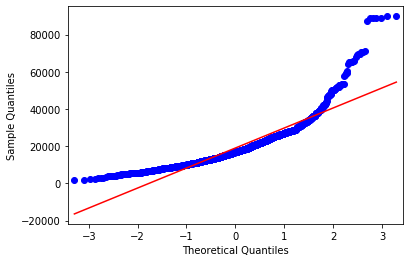

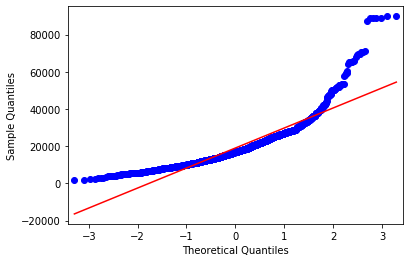

In [291]:
sm.qqplot(df['loan'], line = 's')

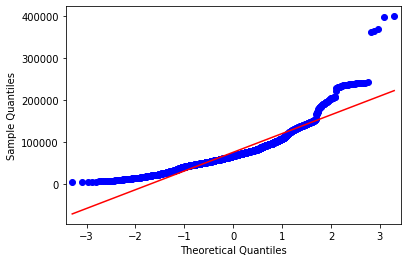

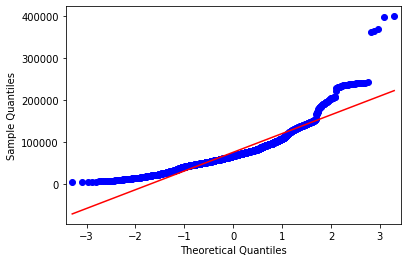

In [292]:
sm.qqplot(df['mortdue'], line = 's')

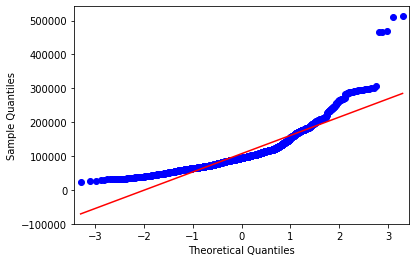

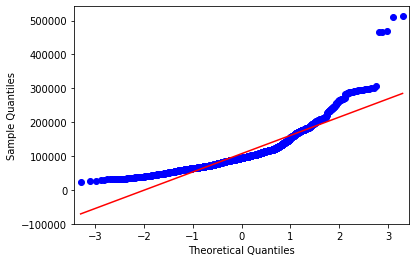

In [293]:
sm.qqplot(df['value'], line = 's')

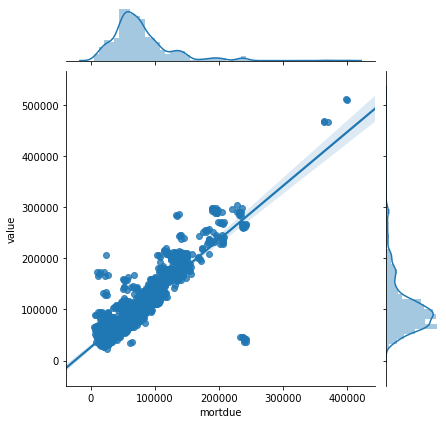

In [294]:
sns.jointplot(x = df['mortdue'], y = df['value'], kind = 'reg')

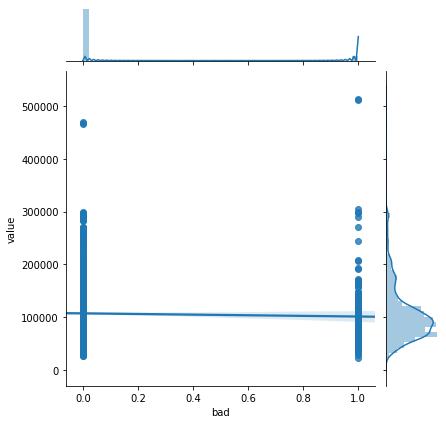

In [295]:
sns.jointplot(x = df['bad'], y = df['value'], kind = 'reg')

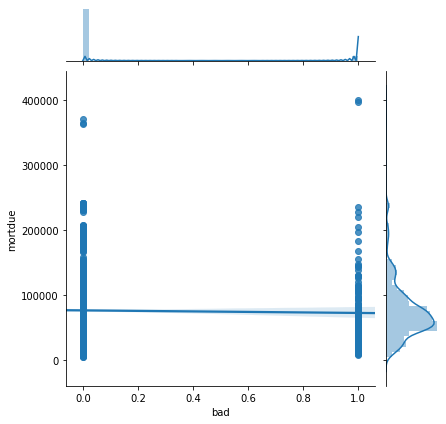

In [296]:
sns.jointplot(x = df['bad'], y = df['mortdue'], kind = 'reg')

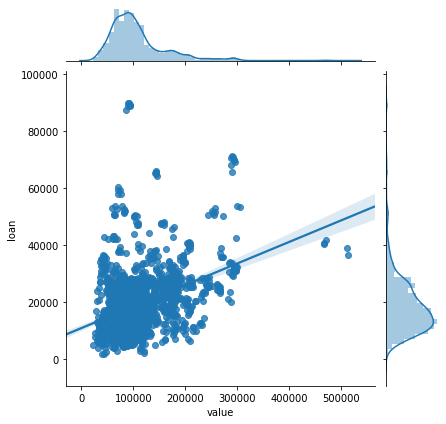

In [297]:
sns.jointplot(x=df['value'],y=df['loan'],kind='reg')

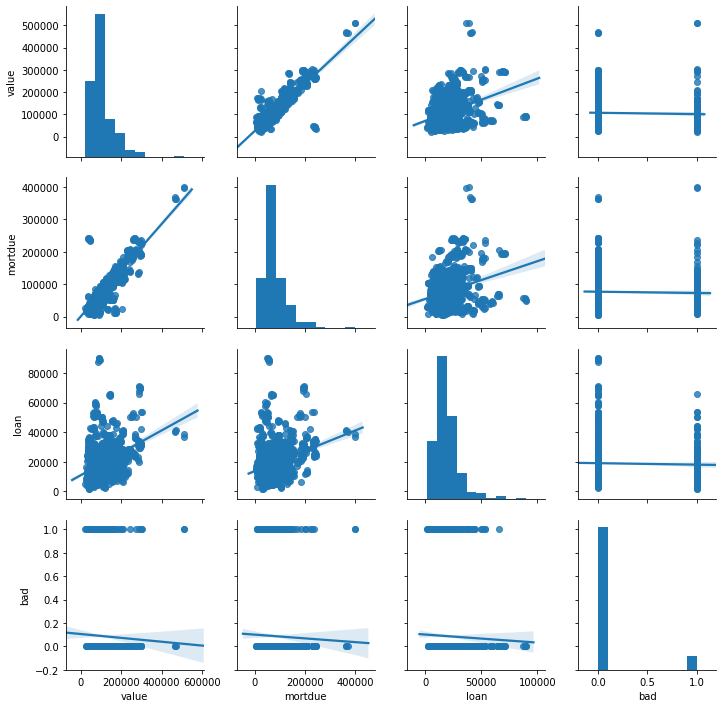

In [298]:
sns.pairplot(df, vars=["value", "mortdue", "loan", "bad"], kind = "reg")

In [299]:
X=df[['value']]
y = df['mortdue']
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mortdue   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:19:36   Log-Likelihood:                -23053.
No. Observations:                2018   AIC:                         4.611e+04
Df Residuals:                    2016   BIC:                         4.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3935   1092.856      0.006      0.995   -2136.852    2149.639
value          0.7140      0.009     78.255      0.000       0.696       0.732
==============================================================================
Omnibus:                     1676.726   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136818.709
Skew:                           3.380   Prob(JB):                         0.00
Kurtosis:                      42.768   Cond. No.                     2.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
lm = smf.ols("bad ~ loan", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bad   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Fri, 27 Sep 2019   Prob (F-statistic):              0.240
Time:                        22:19:36   Log-Likelihood:                -319.62
No. Observations:                2018   AIC:                             643.2
Df Residuals:                    2016   BIC:                             654.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1013      0.013      7.908      0.000       0.076       0.126
loan       -6.897e-07   5.86e-07     -1.176      0.240   -1.84e-06     4.6e-07
==============================================================================
Omnibus:                     1165.761   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6302.214
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                       9.425   Cond. No.                     4.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
model.params

Intercept    1.013181e-01
loan        -6.897299e-07
dtype: float64

In [302]:
model.f_pvalue

0.23971203285230602

In [303]:
r = LinearRegression()#y=b0+b1*x 
model= r.fit(X,y)
model.intercept_

6.393538818170782

In [304]:
model.score(X,y)

0.7523274620492051

In [305]:
predx = model.predict(X)
predx[:10]

array([ 97742.43700887,  69114.3169387 ,  26058.96104138,  54786.333068  ,
        31198.64149096, 131056.82031752,  69549.88307849,  82054.20150487,
        73564.23199313,  62145.97274483])

In [306]:
#predy = model.predict(y)
#predy[:10]

In [307]:
err_df= predx - y 
err_df[:10]

153      3015.437009
154    -10125.683061
155   -215872.038959
156     -8202.666932
157      5339.641491
158     -9271.179682
159     -1159.116922
160      2642.201505
161     -4592.768007
162     10884.972745
Name: mortdue, dtype: float64

In [308]:
err_arr = err_df.values
err_arr[:10]

array([   3015.43700887,  -10125.6830613 , -215872.03895862,
         -8202.666932  ,    5339.64149096,   -9271.17968248,
         -1159.11692151,    2642.20150487,   -4592.76800687,
         10884.97274483])

In [309]:
X = df.iloc[:,[1]]
X.head()

,loan
153,18200
154,21700
155,34100
156,8400
157,17400


In [310]:
y = df.bad.values
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
lr.intercept_

0.10131808703313011

In [312]:
lr.coef_

array([-6.89729858e-07])

In [313]:
df = data.copy()
df.dropna()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
158,0,23900,140328.0,183533.0,HomeImp,Mgr,8.0,0.0,0.0,322.79,0.0,17.0,45.413
159,0,19700,70709.0,97394.0,DebtCon,Mgr,0.0,0.0,0.0,94.86,0.0,17.0,25.557
160,0,17300,79412.0,114906.0,DebtCon,Mgr,17.0,0.0,0.0,247.36,4.0,30.0,36.536
161,0,11700,78157.0,103016.0,DebtCon,Mgr,1.0,0.0,0.0,69.81,2.0,24.0,38.448
162,0,25300,51261.0,87025.0,DebtCon,Mgr,4.0,0.0,0.0,249.84,2.0,25.0,31.659


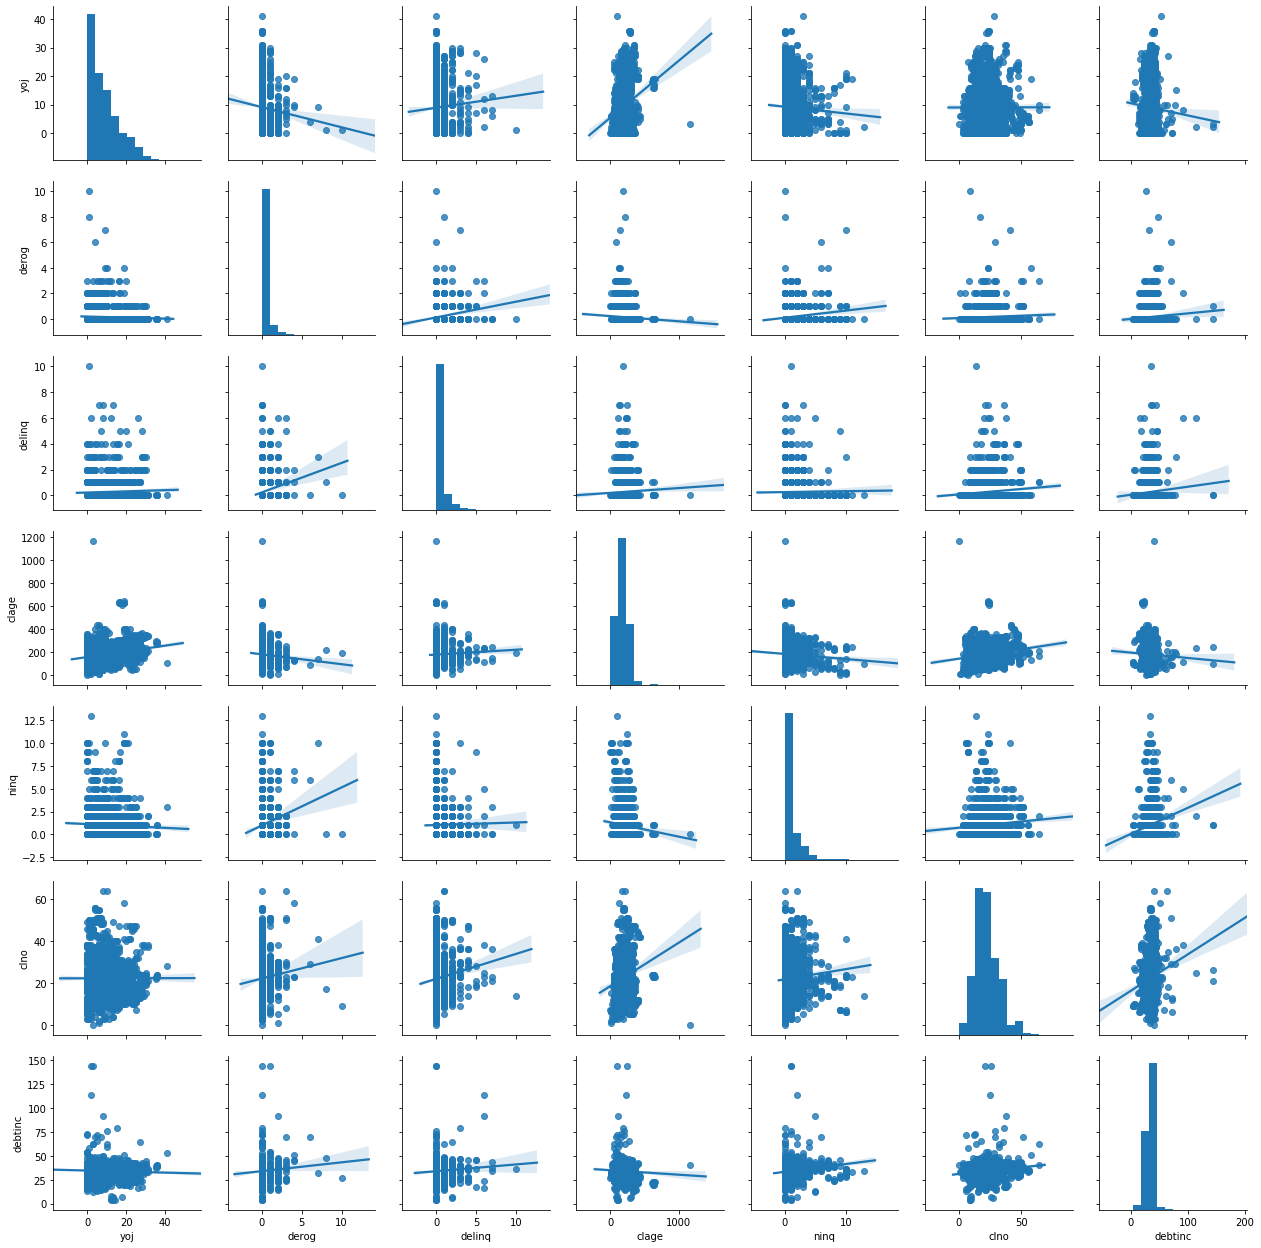

In [314]:
sns.pairplot(df.drop(["bad", "value", "loan", "mortdue"], axis=1), kind = "reg")

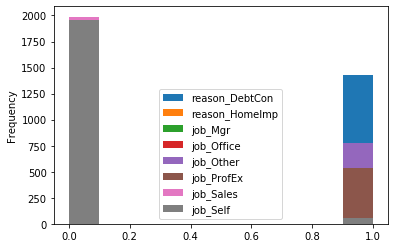

In [315]:
dms = pd.get_dummies(df[["reason", "job"]])
pd.DataFrame(dms).plot.hist()

In [316]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [317]:
df.shape

(2018, 13)

In [318]:
y = data["bad"]
X_ = data.drop(["reason", "job", "bad"], axis=1).astype("float64")
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_Other", "job_ProfEx", "job_Sales", "job_Self"]]], axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0


In [319]:
X = X.drop(['mortdue','value','yoj','ninq','reason_DebtCon'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 50)

In [320]:
y.shape
X.shape

(2018, 12)

In [321]:
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.230091
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2006
Method:                           MLE   Df Model:                           11
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                  0.2288
Time:                        22:19:52   Log-Likelihood:                -464.32
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.213e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -1.316e-05   9.29e-06     -1.417      0.157   -3.14e-05    5.05e-06
derog          0.6197      0.131      4.723      0.000       0.363       0.877
delinq         0.7746      0.092      8.456      0.000       0.595       0.954
clage         -0.0049      0.001     -3.681      0.000      -0.007      -0.002
clno          -0.0306      0.010     -2.977      0.003      -0.051      -0.010
debtinc        0.1144      0.014      8.361      0.000       0.088       0.141
job_Mgr       -5.1493      0.599     -8.601      0.000      -6.323      -3.976
job_Office    -5.7342      0.613     -9.362      0.000      -6.935      -4.534
job_Other     -5.2008      0.548     -9.489      0.000      -6.275      -4.127
job_ProfEx    -5.2453      0.575     -9.116      0.000      -6.373      -4.118
job_Sales     -3.9638      0.770     -5.147      0.000      -5.473      -2.454
job_Self      -4.5211      0.772     -5.860      0.000      -6.033      -3.009
==============================================================================
"""

In [322]:
loj = LogisticRegression(solver = "liblinear") 
loj_model= loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
loj_model.coef_

array([[-3.81804549e-05,  5.24715815e-01,  8.14707618e-01,
        -1.05321889e-02, -4.15322581e-02,  2.77212438e-02,
        -6.97488861e-03, -1.52421068e-01, -1.56652983e-01,
        -9.49354642e-02,  3.77834118e-02,  4.76442823e-02]])

In [324]:
loj_model.intercept_

array([-0.32555671])

In [326]:
y_pred = loj_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9306930693069307

In [344]:
bank_grid = {"max_depth": range(1, 50),
              "min_samples_split": list(range(2,50))}

In [345]:
bank = tree.DecisionTreeClassifier()
bank_cv = GridSearchCV(bank, bank_grid, cv = 10, n_jobs = -1, verbose = 2) 
bank_cv_model = bank_cv.fit(X_train, y_train)

Fitting 10 folds for each of 2352 candidates, totalling 23520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 9550 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 19172 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 23520 out of 23520 | elapsed:   50.0s finished


In [347]:
bank_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 6}

In [349]:
bank = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 6)
bank_tuned = bank.fit(X_train, y_train)
accuracy_score(y_pred, y_test)

0.9306930693069307

In [352]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [354]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8], 
            "n_estimators": [10,1000,2000],
            "min_samples_split": [2,5,10]}
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 5)

In [355]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [357]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [358]:
rf_tuned = RandomForestClassifier(max_depth = 10, max_features = 8, min_samples_split = 2, n_estimators = 2000)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_test_scaled[:2]

array([[ 7.37660141e-01, -2.57644559e-01, -3.38771659e-01,
        -1.07736506e+00, -5.52356732e-01, -1.55396523e-01,
        -3.89298835e-01, -4.56344351e-01,  1.26265027e+00,
        -6.01947328e-01, -1.22850439e-01, -1.75062823e-01],
       [-5.32554538e-01,  3.34145175e+00, -3.38771659e-01,
        -7.03729538e-04,  8.08532198e-01, -8.21946046e-01,
        -3.89298835e-01, -4.56344351e-01, -7.91984939e-01,
         1.66127492e+00, -1.22850439e-01, -1.75062823e-01]])

In [366]:
mlpc = MLPClassifier().fit(X_train,y_train)
accuracy_score(y_test,y_pred)

0.9306930693069307

In [367]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [368]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [369]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 447 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 730 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1095 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         '

In [370]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.005,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [371]:
mlpc_tuned = MLPClassifier(activation="relu", alpha=1.005, hidden_layer_sizes=(100,100), solver="adam")

In [372]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)